In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Create a set of random data using the function f(x) = w * x + b
## Where true b = 1 and true w = 2
true_w = 2
true_b = 1 
N = 100

caroline = np.random.default_rng(seed = 42)
x = caroline.random(size = N)
epsilon = (.3 * caroline.standard_normal(size = N))  ##introduce some noise into the test data
y = true_b + true_w * x + epsilon
data = np.array([x, y])
print(data)

[[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
  0.7611397  0.78606431 0.12811363 0.45038594 0.37079802 0.92676499
  0.64386512 0.82276161 0.4434142  0.22723872 0.55458479 0.06381726
  0.82763117 0.6316644  0.75808774 0.35452597 0.97069802 0.89312112
  0.7783835  0.19463871 0.466721   0.04380377 0.15428949 0.68304895
  0.74476216 0.96750973 0.32582536 0.37045971 0.46955581 0.18947136
  0.12992151 0.47570493 0.22690935 0.66981399 0.43715192 0.8326782
  0.7002651  0.31236664 0.8322598  0.80476436 0.38747838 0.2883281
  0.6824955  0.13975248 0.1999082  0.00736227 0.78692438 0.66485086
  0.70516538 0.78072903 0.45891578 0.5687412  0.139797   0.11453007
  0.66840296 0.47109621 0.56523611 0.76499886 0.63471832 0.5535794
  0.55920716 0.3039501  0.03081783 0.43671739 0.21458467 0.40852864
  0.85340307 0.23393949 0.05830274 0.28138389 0.29359376 0.66191651
  0.55703215 0.78389821 0.66431354 0.40638686 0.81402038 0.16697292
  0.02271207 0.09004786 0.72235935 0.46187723 0.161

In [3]:
## Randomize and split the data into training data and validation data.
idx = np.arange(N)
caroline.shuffle(idx)

train_idx = idx[:int(N*.8)]
val_idx = idx[int(N*.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [4]:
print(x_train.shape)
print(y_train.shape)

(80,)
(80,)


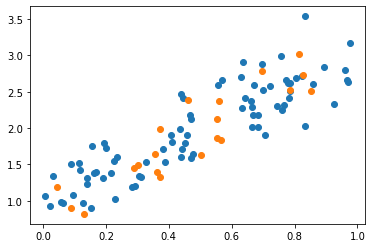

In [5]:
## Plot the training and validation data
plt.scatter(x_train,y_train)
plt.scatter(x_val,y_val)

In [6]:
# Initialize parameters for the model "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

In [7]:
print(b, w)

[0.49671415] [-0.1382643]


Our randomly initialized parameters are: b = 0.49 and w = -0.13.

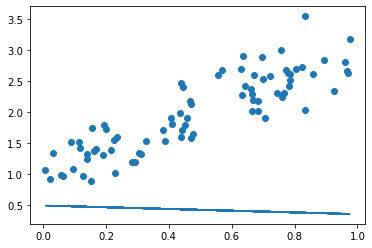

In [8]:
## Using the random values of w, b, plot the line and compare it to the data. It's way off. 
plt.scatter(x_train,y_train)
plt.plot(x, w*x+b)

In [9]:
## Calculate how far off it really is using the Mean Squared Error function (MSE)

yhat = b + w * x_train #the model's predicted y
error = (yhat - y_train)

loss = (error ** 2).mean() # computes mean squared error (MSE)
print(loss)

2.8586444985804405


In [10]:
## Now I iterate over several possible values of w and b, and calculate J for each, storing the results in an array

b = -2
w = -2

losses = np.array([])
ws = np.array([])
bs = np.array([])

for i in range(25):
    w = -2
    for j in range(25):
        yhat = b + (w*x_train)
        error = (yhat-y_train)
        loss = (error ** 2).mean()
        losses = np.append(losses, loss)
        ws = np.append(ws, w)
        bs = np.append(bs, b)
        w += .5
    b += .5

print(losses)

[2.59808195e+01 2.33170941e+01 2.08126028e+01 1.84673458e+01
 1.62813230e+01 1.42545343e+01 1.23869798e+01 1.06786595e+01
 9.12957341e+00 7.73972149e+00 6.50910375e+00 5.43772020e+00
 4.52557083e+00 3.77265565e+00 3.17897466e+00 2.74452785e+00
 2.46931522e+00 2.35333679e+00 2.39659253e+00 2.59908247e+00
 2.96080658e+00 3.48176489e+00 4.16195738e+00 5.00138405e+00
 6.00004491e+00 2.12645499e+01 1.88457505e+01 1.65861853e+01
 1.44858542e+01 1.25447574e+01 1.07628947e+01 9.14026618e+00
 7.67687187e+00 6.37271175e+00 5.22778581e+00 4.24209406e+00
 3.41563649e+00 2.74841311e+00 2.24042392e+00 1.89166891e+00
 1.70214808e+00 1.67186144e+00 1.80080899e+00 2.08899072e+00
 2.53640664e+00 3.14305675e+00 3.90894103e+00 4.83405951e+00
 5.91841217e+00 7.16199902e+00 1.70482804e+01 1.48744070e+01
 1.28597677e+01 1.10043626e+01 9.30819176e+00 7.77125506e+00
 6.39355255e+00 5.17508423e+00 4.11585009e+00 3.21585014e+00
 2.47508437e+00 1.89355279e+00 1.47125539e+00 1.20819218e+00
 1.10436316e+00 1.159768

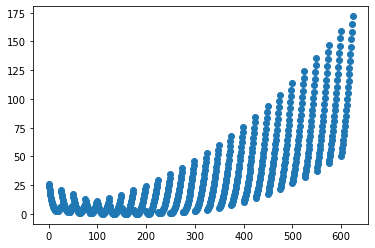

In [11]:
## plot the values for J
plt.scatter(range(len(losses)), losses)

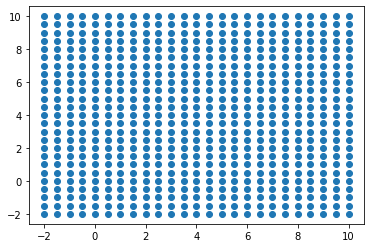

In [12]:
## If you plot all the possible combinations of w and b that we used, this is what it will look like. A grid.
plt.scatter(ws,bs)

In [13]:
## Find the minimum J or loss value, and the corresponding w, and b. 
## These will be used in the model. In this case, the best value of w and b match the true w and b perfectly.
min_index = np.argmin(losses)
model_w = ws[min_index]
model_b = bs[min_index]
print(losses[min_index])
print(ws[min_index])
print(bs[min_index])

0.08840344455060625
2.0
1.0


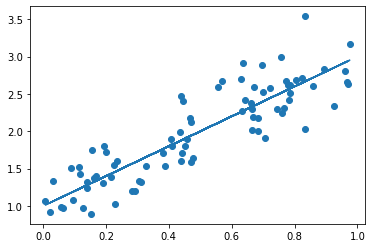

In [14]:
## Plot the model; pretty good fit
plt.scatter(x_train,y_train)
plt.plot(x, model_w*x+model_b)

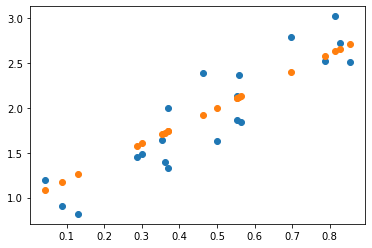

In [15]:
## Compare the model to the validation data
plt.scatter(x_val,y_val)
plt.scatter(x_val, (model_w*x_val)+model_b)

<br>
<br>
<br>

# Loss Surface and Conture Plots Demo

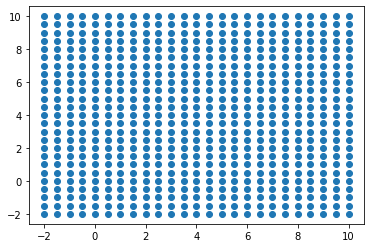

In [16]:
## Here are all the possible combinations of w and b again.
plt.scatter(ws,bs)

In [17]:
## Now I only want to look at the values of w,b where J is in the lowest lowest range
## low_range is a list if indicies where J is between .08 and .09

low_range = np.where((losses > .08) & (losses < .9))[0]
print(low_range)

[ 86  87  88  89 109 110 111 112 113 132 133 134 135 136 137 155 156 157
 158 159 160 161 179 180 181 182 183 184 203 204 205 206 207 227 228 229
 230]


In [18]:
## Select the corresponding values of w, b for the range of J
lowest_loss = losses[low_range]
lowest_w = ws[low_range]
lowest_b = bs[low_range]
print(lowest_w)
print(lowest_b)

[ 3.5  4.   4.5  5.   2.5  3.   3.5  4.   4.5  1.5  2.   2.5  3.   3.5
  4.   0.5  1.   1.5  2.   2.5  3.   3.5  0.   0.5  1.   1.5  2.   2.5
 -0.5  0.   0.5  1.   1.5 -1.  -0.5  0.   0.5]
[-0.5 -0.5 -0.5 -0.5  0.   0.   0.   0.   0.   0.5  0.5  0.5  0.5  0.5
  0.5  1.   1.   1.   1.   1.   1.   1.   1.5  1.5  1.5  1.5  1.5  1.5
  2.   2.   2.   2.   2.   2.5  2.5  2.5  2.5]


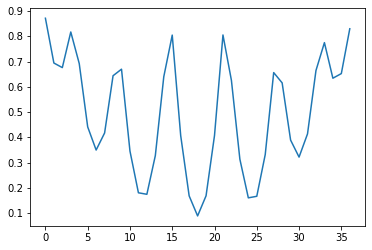

In [23]:
## If we graph J, this is our loss surface graph. 
## J approaches 0 on the y axsis, which it does in the middle.
plt.plot(range(len(lowest_loss)), lowest_loss)

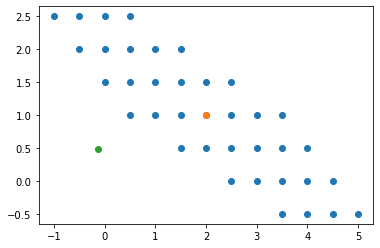

In [24]:
## When we plot this specific range of w, b, it looks like an ellipse
## This is the Contour Plot of the smallest loss values

## The model gave us 2, 1 for the values of w, b. This value can be found at the center (the lowest value of J)
## The randomly selected start point of -.13 and .49 is in green at the bottom. 

plt.scatter(lowest_w, lowest_b)
plt.scatter(2, 1)
plt.scatter(-.13,.49)

By looking at the contour plot, we can see how far off from true_w and true_b we are. 
The scale makes a big difference. The smaller the scale, the less computing the computer has to do to arrive at the answer.

<br>
<br>

# Feature Scaling

### Standardize the data
Adjust the data so that the standard deviation is 1 and the mean is 0.<br>
First, I want to illustrate what different standard devaitions look like in a histogram, using random data. 

standard deviation:  0.9659522350633857


<function matplotlib.pyplot.show(close=None, block=None)>

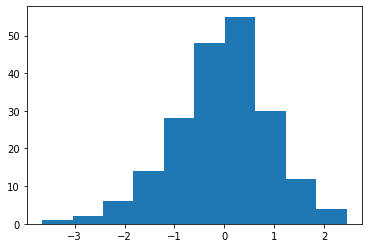

In [28]:
peppermint = caroline.standard_normal(size = 200)
peppermint_stdev = np.std(peppermint)
plt.hist(peppermint)
print("standard deviation: ",peppermint_stdev) ## close to 1
plt.show

standard deviation:  965.9522350633857


<function matplotlib.pyplot.show(close=None, block=None)>

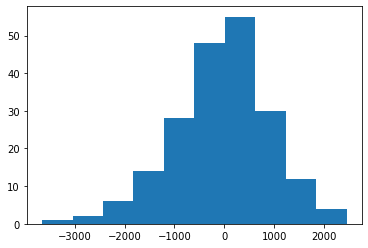

In [29]:
### If we multiplied all our variables by 1000, the values (of x) would change, and the standard deviation would also increase
citrus = peppermint*1000
citrus_stdev = np.std(citrus)
print("standard deviation: ", citrus_stdev) #standard deviation is now close to 1,000
plt.hist(citrus) #but the histogram has the same shape
plt.show

#### Use scaler.fit to standardize our original data, x_train. 
This will transform the data so the stdev is 1 and the mean is 0

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
print(x_train)
print("Standard Deviation: ", np.std(x_train))
print(x_train.shape)

[0.45038594 0.09417735 0.31236664 0.6824955  0.16127178 0.78072903
 0.76499886 0.89312112 0.05830274 0.80476436 0.63471832 0.1523121
 0.82276161 0.69632038 0.19463871 0.8322598  0.29359376 0.43887844
 0.15428949 0.12811363 0.75808774 0.55703215 0.85859792 0.32582536
 0.11453007 0.40852864 0.97562235 0.7611397  0.13975248 0.77395605
 0.64386512 0.22723872 0.02271207 0.66431354 0.72235935 0.97069802
 0.5687412  0.38747838 0.22690935 0.66981399 0.09004786 0.66485086
 0.78606431 0.43715192 0.3039501  0.21458467 0.1999082  0.47570493
 0.03081783 0.63028259 0.00736227 0.38102123 0.96750973 0.7002651
 0.8326782  0.47109621 0.70516538 0.06381726 0.7783835  0.68304895
 0.466721   0.18947136 0.96189766 0.139797   0.92676499 0.4434142
 0.78389821 0.45891578 0.1180059  0.66191651 0.6316644  0.46955581
 0.44615628 0.16697292 0.40638686 0.74476216 0.66840296 0.43671739
 0.23393949 0.28138389]
Standard Deviation:  0.2802024592966329
(80,)


In [32]:
scaler = StandardScaler(with_mean=True, with_std=True)

# If you're using data with only one feature (a one dimensional array), you need to reshape it before using scaler.fit
reshaped_x_train = x_train.reshape(-1,1)
reshaped_x_val = x_val.reshape(-1,1)
# print(reshaped_x_train)

# We use the TRAIN set ONLY to fit the scaler
scaler.fit(reshaped_x_train)

StandardScaler()

In [33]:
print(reshaped_x_train.shape)

(80, 1)


In [34]:
# Now we can use the already fit scaler to transform both training and validation sets
scaled_x_train = scaler.transform(reshaped_x_train)
scaled_x_val = scaler.transform(reshaped_x_val)

standard deviation:  0.2802024592966329
mean:  0.48985197046709705


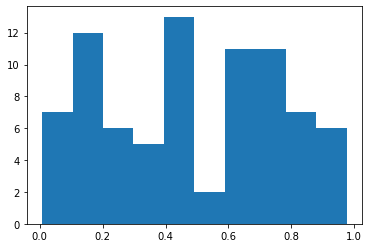

In [35]:
plt.hist(x_train)
print("standard deviation: ", np.std(reshaped_x_train))
print("mean: ", np.mean(reshaped_x_train))

standard deviation:  0.9999999999999998
mean:  2.4424906541753446e-16


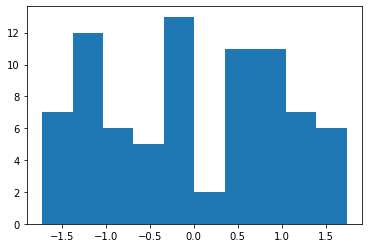

In [36]:
plt.hist(scaled_x_train)
print("standard deviation: ", np.std(scaled_x_train))
print("mean: ", np.mean(scaled_x_train))   ## close to 0

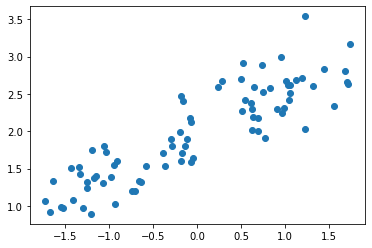

In [37]:
## This plot looks exactly like our plot of x_train and y_train, except the scale is different on the x axis.
## plt.scatter(x_train,y_train)

plt.scatter(scaled_x_train, y_train)

In [38]:
## Iterate through several possible values of w, b, and calculate the MSE for each, this time, using the scaled x_train data
## You might need to adjust the number of iterations and the scale at which w increases, or else you overshoot the best fit values

w = 1
b = -1

losses = np.array([])
ws = np.array([])
bs = np.array([])

for i in range(30):
    w = 1
    for j in range(30):
        yhat = b + (w*scaled_x_train)
        error = (yhat-y_train)
        loss = (error ** 2).mean()
        losses = np.append(losses, loss)
        ws = np.append(ws, w)
        bs = np.append(bs, b)
        w += .01
    b += .25

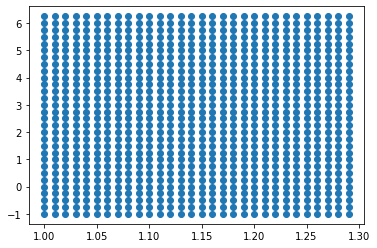

In [39]:
plt.scatter(ws,bs)

In [41]:
### while true_w and true_b are 2 and 1, the results of this process get a very different result... 
## in the model above, w = 2.0 and b = 1.0


## Find the minimum J or loss value, and the corresponding w, and b. 
## These will be used in the model. 
min_index = np.argmin(losses)
model_w = ws[min_index]
model_b = bs[min_index]
print(losses[min_index])
print("w: ", ws[min_index])
print("b: ",bs[min_index])

1.3887981425120655
w:  1.0
b:  2.0


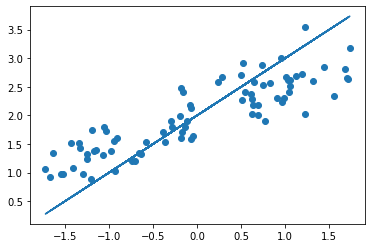

In [38]:
## Plot the model (using the values from the scaled data) against the scaled x_train
## The line fits. But we're using scaled data for X. 
plt.scatter(scaled_x_train, y_train)
plt.plot(scaled_x_train, model_w*scaled_x_train+model_b)

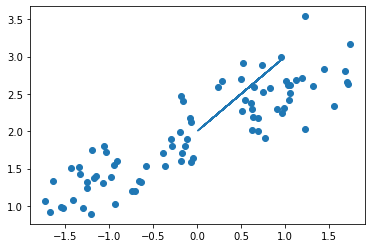

In [42]:
## Compare the model line to the original, unscaled data. It doesn't fit. 
## You'll need to scale all the data going into the model, but plot the results using unscaled values for x. 

plt.scatter(scaled_x_train, y_train)
plt.plot(x_train, model_w*x_train+model_b)

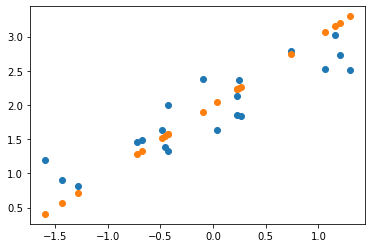

In [43]:
plt.scatter(scaled_x_val,y_val)
plt.scatter(scaled_x_val, ((model_w*scaled_x_val)+model_b))

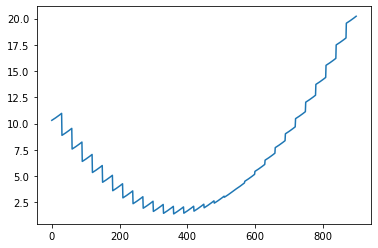

In [44]:
plt.plot(range(len(losses)), losses)